# Exercice 1 : Coefficients binomiaux

## Objectif
L’objectif de cette exercice est de représenter graphiquement des coefficients binomiaux disposés de la manière suivante :
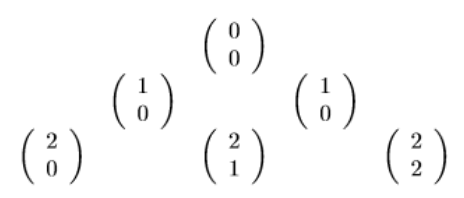



en remplaçant chaque coefficient binomial par un carré de couleur associé à sa valeur. La figure obtenue étant sur un fond d’une couleur donnée. 

On peut par exemple choisir le code couleur suivant : si la valeur du coefficient est supérieure ou égale à deux, la case est verte, sinon la case est jaune. La couleur du fond est noire. Voici la figure obtenue :
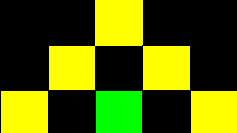

Posons N la plus grande valeur de n telle que l’on calcule k parmi n pour tout k entre 0 et n. La figure ci-dessus représente le cas N=2. Avec la même règle de représentation, nous obtenons la figure suivante pour N = 8 :


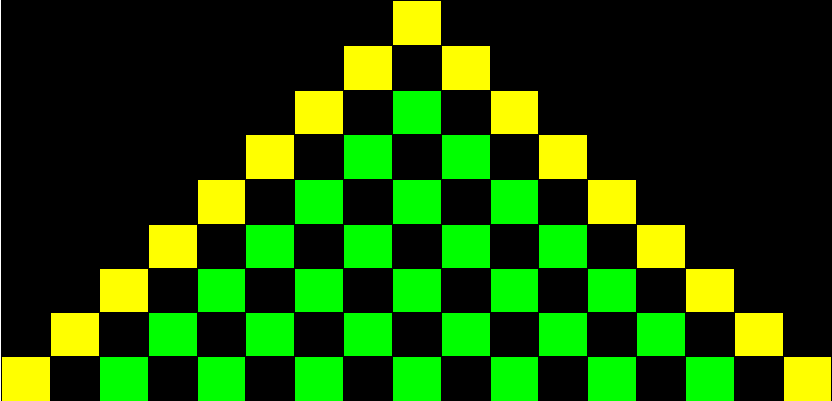


#### L’objectif de cet exercice sera de faire des représentations graphiques des coefficients binomiaux pour de grandes valeurs de N et pour différentes colorations.


## Méthode
Pour ce faire, nous allons de nouveau utiliser Python. Il y a deux grandes étapes :

 1- Le calcul des coefficients binomiaux
 
 2- L'affichage

## 1- Calcul des coefficients binomiaux         
                                                  
Nous souhaitons calculer tous les coefficients binomiaux coeff(n, k) pour tout couple(n, k) tel que 0<=k<=n<=N. 

Nous allons donc créer une matrice matCoefs qui contient tous ces coefficients binomiaux. 
L'indice en ligne est n et l'indice en colonne est k. Si un coefficient n'est pas encore calculé ou n'existe pas, son emplacement dans la matrice est rempli par -1.

Voici un exemple de matCoefs pour N = 2 :    

### Définition des paramètres

In [24]:
def cree_matCoefs(N):
    """
    Prérequis : N>= 0
    Renvoie une matrice de taille (N+1) * (N+1) dont tous les coefficients valent -1
    """
    matCoefs = [[-1] * (N+1)] * (N+1)
    # Pour l'instant matCoefs contient N+1 fois la même variable ligne : donc si l'une 
    # des lignes de la matrice est modifiée, toutes les autres le sont également puisqu'il
    # ne s'agit en réalité que d'une seule et même ligne. On parle d'aliasing.
    # Ce n'est pas ici le propos, nous allons donc simplement remplacer les N premières
    # lignes par des lignes qui ont la même valeur mais ne sont pas la même variable.
    for i in range(N) :
        matCoefs[i] = [-1] * (N+1)
    return(matCoefs)

In [25]:
# N est la valeur maximale de n pour laquelle on calculera les coeff(n, k)
N = 5                          
matCoefs = cree_matCoefs(N)

[[-1, -1, -1, -1, -1, -1], [-1, -1, -1, -1, -1, -1], [-1, -1, -1, -1, -1, -1], [-1, -1, -1, -1, -1, -1], [-1, -1, -1, -1, -1, -1], [-1, -1, -1, -1, -1, -1]]


### Calcul d'un unique coefficient binomial
Pour commencer, remplissez la fonction coeff qui renvoie un seul coefficient binomial. Elle permettra de remplir matCoefs. 

#### N'oubliez pas de lire les prérequis de la fonction ainsi que les conseils dispensés en commentaires. 

In [26]:
def coeff(n, k) :
    """
    Prérequis : k et n sont des entiers naturels et 0<=k<=n
    Range le coefficient binomial coeff(n, k) dans la matrice matCoefs.
    Ne renvoi rien."""
    
    ##############################################################################
    #                                  Conseils                                  #
    # Pensez à optimiser le calcul des coefficients binomiaux, pour cela, il est #
    # judicieux de se renseigner sur les relations entre les différents          #
    # coefficients binomiaux. Découper le problème en sous-problème s'appelle    #
    # "programmation dynamique" ici, cela permet de stocker et d'utiliser les    #
    # valeurs précédemment calculées plutôt que d'appliquer une formule générale #
    # coûteuse en temps de calcul.                                               #
    # Il peut être utile de rendre la fonction récursive.                        #
    # On veillera à ce que tous les cas de figure prévus par les spécifications  #
    # soient pris en compte.                                                     #
    ##############################################################################
    
    # On s'assure que n>=k>=0
    assert(n >= k)
    assert(k >= 0)
    
    # Remplir ici
    
    # On regarde tout d'abord si le coefficient a déjà été calculé. Si tel est le 
    # cas, on s'arrête là.
    
    if matCoefs[n][k] != -1 :
        pass 
    else :
        
        # matCoefs[n][k] vaut -1, donc coeff(n, k) n'est pas connu et doit être calculé.
        
        if n == 0 or k == 0 or k == n:
            
            # Si l'on se trouve dans l'une de ces trois situations, coeff(n, k) vaut 1
            # Il est donc inutile de le calculer.
            
            matCoefs[n][k] = 1
            
        
        else :
        
            # Si ce n'est pas le cas, il faut calculer la valeur de coeff(n, k). Pour 
            # cela nous utiliserons la formule suivante qui est alors valide :
            #  coeff(n, k) = coeff(n-1, k-1) + coeff(n-1, k)
        
            # L'utilisation de cette formule nécessite de traîter à part les cas n=0,
            # k=0 et k=n, ce qui a été fait plus haut.
        
            # Comme nous utilisons d'autres coefficients binomiaux pour calculer coeff(n,k)
            # il nous faut nous assurer que ceux-ci sont déjà calculés et s'ils ne le 
            # sont pas, il faut les calculer. On utilise pour cela matCoefs qui répertorie
            # tous les coefficients déjà calculés.
        
            if matCoefs[n-1][k-1] == -1 :
                coeff(n-1, k-1)
                
            if matCoefs[n-1][k] == -1 :
                coeff(n-1, k)
                
            
            # Application de la formule
        
            matCoefs[n][k] = matCoefs[n-1][k-1] + matCoefs[n-1][k]

Testez la fonction codée et comparez les résultats obtenus avec des coefficients calculés à la main. 
Un bon test prend en compte différents cas de figure dont les cas limites comme k=n=0, k=n etc.

In [27]:
coeff(0, 0)
coeff(3, 0) 
coeff(4, 1)
coeff(5, 5)
coeff(1, 1)
print(matCoefs)

[[1, -1, -1, -1, -1, -1], [1, 1, -1, -1, -1, -1], [1, 2, -1, -1, -1, -1], [1, 3, -1, -1, -1, -1], [-1, 4, -1, -1, -1, -1], [-1, -1, -1, -1, -1, 1]]


Testez votre fonction pour N = 20. Le temps de calcul est-il satisfaisant ? Si ce n'est pas le cas, il vous faut coder cette fonction de manière plus efficace. Pour cela suivez les conseils en commentaires.

In [28]:
N = 5                           
matCoefs = cree_matCoefs(N)
coeff(N, N)

### Remplissage de la matrice matCoefs
Il est maintenant temps de remplir la matrice matCoefs. Pour cela, complétez la fonction rempli_matCoefs.

#### N'oubliez pas de lire les prérequis de la fonction ainsi que les conseils dispensés en commentaires.

In [29]:
def rempli_matCoefs(N) :
    """
    Prérequis : 
    N est un entier naturel.
    matCoefs est une matrice de taille (N+1)*(N+1).
    
    Revoie une matrice d'entier naturels contenant en position (n, k) coeff(n, k) 
    si ce nombre existe et -1 sinon.
    """
    
    ##############################################################################
    #                                  Conseils                                  #
    # Faites appel à la fonction coeff et réfléchissez à l'ordre de remplissage  #
    # pour permettre de faciliter le calcul de coeff(n, k)                       #
    ##############################################################################
    
    # Remplir ici
    
    # Comme nous avons veillé dans la fonction coeff à ce que tous les cas soient
    # traités correctement et que les coefficients déjà calculés ne le soient pas 
    # deux fois, l'ordre de calcul n'est pas important. 
    # Si nous n'avions pas pris soin d'éviter les répétitions de calcul, nous devrions
    # nous soucier de l'ordre des calculs.
    
    for n in range(N + 1):
        for k in range(n + 1) :
            coeff(n, k)

Testez votre fonction en utilisant une petite valeur de N.

In [30]:
N = 5
matCoefs = cree_matCoefs(N)
rempli_matCoefs(N)
print(matCoefs)

[[1, -1, -1, -1, -1, -1], [1, 1, -1, -1, -1, -1], [1, 2, 1, -1, -1, -1], [1, 3, 3, 1, -1, -1], [1, 4, 6, 4, 1, -1], [1, 5, 10, 10, 5, 1]]


## 2- Affichage
L'affichage se fait en trois temps :

1- Associer une couleur à chaque coefficient binomial

2- Associer une position et une taille sur l'image à chaque coefficient binomial

3- Créer l'image

Les détailles techniques de chaque étape seront détaillés au fur et à mesure.

## 2-1- La couleur
Commençons d'abord par définir quelques paramètres importants.

In [31]:
# nombre de bits utilisé pour chaque composante R, G
# et B de l'affichage
nb_bits_couleurs = 8
# nombre de valeur pouvant être prise par ces bits
nb_niveaux_gris = 2**nb_bits_couleurs
# valeur associée à la couleur noire
NOIR = 0
# valeur associée à la couleur blanche
BLANC = nb_niveaux_gris - 1

La couleur d'un pixel est remprésentée par un triplet d'entiers compris entre NOIR et BLANC. Il définit le niveau de luminosité de chaque composante RGB de la couleur.

Voici quelques exemples :

Remplissez la fonction trouve_couleur qui associe une couleur à chaque valeur de coefficient binomial.
Vous pouvez choisir le coloriage qui vous convient.

In [32]:
def trouve_couleur(valeur, NOIR, BLANC) :
    """
    Prérequis :
    Valeur, NOIR et BLANC sont des entiers, BLANC > NOIR >= 0.
    
    Renvoie un tableau à trois éléments. Ces éléments sont des entiers compris entre 
    NOIR et BLANC inclus.
    Ce tableau représente la couleur associée à une valeur de coefficient binomial
    valeur dans la convention RGB décrite ci-dessus.
    """
    
    # Nous commençons la fonction par des tests afin de s'assurer que les prérequis
    # concernant NOIR et BLANC sont respecté. Il est laissé au programmeur la possibilité
    # d'ajouter des tests supplémentaires. 
    
    assert(NOIR >= 0)
    assert(BLANC > NOIR)
    
    # Remplissez la fin de la fonction
    
    #####################################################################################
    #  On choisit ici le code couleur présenté en introduction :                        #
    #  -jaune si coeff(n,k) < 2                                                         #
    #  -vert sinon                                                                      #
    #  -noir pour le fond                                                               #
    #####################################################################################
    
    jaune = [BLANC, BLANC, NOIR]
    vert = [NOIR , BLANC, NOIR ]
    
    if valeur < 2 :
        return jaune
    else :
        return vert

### 2-2- La position et la taille
Il nous faut maintenant associer à chaque coefficient binomial sa taille et sa position dans l'image.

Commençons par sa taille, :

In [33]:
# Longueur du côté des cases représentant les coefficients
taille_case = 3 # en nombre de pixels

Nous définissons maintenant la fonction zone_case qui, pour un coefficent coeff(n, k), renvoie deux tableaux indiquant quels pixels représentent coeff(n,k). Il s'agit ici uniquement de savoir où ces pixels seront et non pas de quelle couleur ils seront.

In [34]:
def zone_case(N, n, k, taille_case):
    """ 
    Prérequis :
    N, n et k sont des entiers naturels, N est non nul et k<=n.
    
    Renvoie un couple de tableaux d'entiers (intervalle_i, intervalle_j). Ces tableaux sont
    tels que dans une représentation pyramidale des coefficients binomiaux, le coefficient 
    coeff(n, k) est représenté par une case dont les pixels ont des coordonnées (i, j) 
    avec i dans intervalle_i et j dans intervalle_j.
    """
    intervalle_i = range(n * taille_case, (n+1) *  taille_case)
    intervalle_j = range((2 * k + (N - n))* taille_case, (2 * k + (N - n) + 1)* taille_case )
    return intervalle_i, intervalle_j

### 2-3- Création de l'image
Pour afficher l'image, il nous faut tout d'abord définir la couleur du fond.

In [35]:
# Représentation de la couleur du fond au format RGB
couleur_fond = [NOIR, NOIR, NOIR]

Importons la librairie nécessaire au tracé.

In [36]:
import matplotlib.pyplot as plt

Définissons maintenant la fonction affiche_coefs qui affiche la représentation des coefficients binomiaux.

In [37]:
def affiche_coefs(N, matCoefs, couleur_fond, taille_case, trouve_couleur):
    """
    Affiche une image représentant les coefficients de matCoefs selon le code 
    couleur prévus dans la fonction trouve_couleur.
    
    Prérequis :
    N est un entier positif.
    matCoefs est une matrice d'entiers positifs de taille (N+1)*(N+1).
    Couleur_fond est un entier compris entre NOIR et BLANC.
    trouve_couleur est une fonction répondant aux spécifications suivantes :
    ---------------------------------------------------------------------------------- 
    def trouve_couleur(valeur, NOIR, BLANC) :  
        Prérequis :
        Valeur, NOIR et BLANC sont des entiers, BLANC > NOIR >= 0.
    
        Renvoie un tableau à trois éléments. Ces éléments sont des entiers compris entre 
        NOIR et BLANC inclus.
        Ce tableau représente la couleur associée à une valeur de coefficient binomial
        valeur dans la convention RGB décrite ci-dessus.
    ----------------------------------------------------------------------------------
    """
    # matImage est la matrice contenant les couleurs de tous les pixels, tels qu'ils
    # seront positionnés dans l'image (l'élément en position [i][j] dans la matrice 
    # représente le pixel sur la i-ème ligne et la j-ème colonne).
    # Ses dimensions sont donc les dimensions de l'image :
    #   largeur : (2 * N + 1) * taille_case pour N + 1 coefficients et N cases vides
    #    sur la dernière ligne
    #   hauteur : (N + 1) * taille_case pour N + 1 lignes
    # On notera qu'initialement matImage représente une image uniforme de la couleur
    # du fond.
    
    # Ne pas modifier la création de matImage
    matImage = [[couleur_fond]* (2 * N + 1) * taille_case] * (N + 1) * taille_case
    for i in range((N+1) * taille_case) :
        matImage[i] =[couleur_fond]* (2 * N + 1) * taille_case
    
    # Complétez matImage
    for n in range (N + 1):
        for k in range(n+1):
            intervale_i, intervale_j = zone_case(N, n, k, taille_case)
            couleur = trouve_couleur(matCoefs[n][k], NOIR, BLANC)
            for i in intervale_i :
                for j in intervale_j :
                    matImage[i][j] = couleur

    # Affichage
    plt.imshow(matImage)

Testez la fonction obtenue.

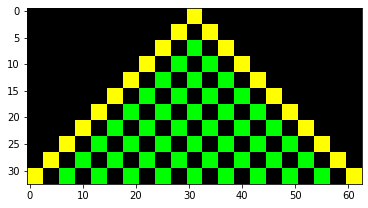

In [38]:
N = 10
matCoefs = cree_matCoefs(N)
rempli_matCoefs(N)
affiche_coefs(N, matCoefs, couleur_fond, taille_case, trouve_couleur)

## 3- Et les fractales alors ?
Nous n'en avons toujours pas vu... 

## 3-1- Parité
Remplissez la fonction trouve_couleur_parite de manière à ce quelle colorie en une couleur A les coefficients pairs, en une couleur B les coefficients impairs et en une couleur C le fond de la figure avec A, B et C des couleurs bien distinctes.

In [39]:
def trouve_couleur_parite(valeur, NOIR, BLANC) :
    """
    Prérequis :
    Valeur, NOIR et BLANC sont des entiers, BLANC > NOIR >= 0.
    
    Renvoie un tableau à trois éléments. Ces éléments sont des entiers compris entre 
    NOIR et BLANC inclus.
    Ce tableau représente la couleur associée à une valeur de coefficient binomial
    valeur dans la convention RGB décrite ci-dessus.
    """
    
    # Nous commençons la fonction par des tests afin de s'assurer que les prérequis
    # concernant NOIR et BLANC sont respecté. Il est laissé au programmeur la possibilité
    # d'ajouter des tests supplémentaires. 
    
    assert(NOIR >= 0)
    assert(BLANC > NOIR)
    
    
    bleu_clair = [int(BLANC/2), int(BLANC/2), BLANC]
    rose_clair = [BLANC, int(BLANC/2)  , BLANC]
    
    if valeur%2 == 0 :
        return bleu_clair
    else :
        return rose_clair

Testez cette nouvelle façon de colorier avec une valeur de N suffisamment grande (au moins 50)

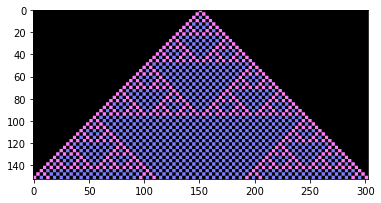

In [40]:
N = 50
matCoefs = cree_matCoefs(N)
rempli_matCoefs(N)
affiche_coefs(N, matCoefs, couleur_fond, taille_case, trouve_couleur_parite)

#### Reconnaissez-vous une figure connue ? Ou plus précisément une fractale connue ?

## 3-2- Quid des autres multiples ?
Faites de même pour les multiples de 3 et 5

In [41]:
def trouve_couleur_3(valeur, NOIR, BLANC) :
    """
    Prérequis :
    Valeur, NOIR et BLANC sont des entiers, BLANC > NOIR >= 0.
    
    Renvoie un tableau à trois éléments. Ces éléments sont des entiers compris entre 
    NOIR et BLANC inclus.
    Ce tableau représente la couleur associée à une valeur de coefficient binomial
    valeur dans la convention RGB décrite ci-dessus.
    """
    
    # Nous commençons la fonction par des tests afin de s'assurer que les prérequis
    # concernant NOIR et BLANC sont respecté. Il est laissé au programmeur la possibilité
    # d'ajouter des tests supplémentaires. 
    
    assert(NOIR >= 0)
    assert(BLANC > NOIR)
    
    vert_clair = [int(BLANC/2), BLANC, int(BLANC/2)]
    orange = [BLANC, int(BLANC/2)  , int(BLANC/2)]
    
    if valeur%3 == 0 :
        return vert_clair
    else :
        return orange

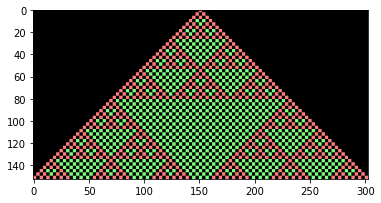

In [42]:
affiche_coefs(N, matCoefs, couleur_fond, taille_case, trouve_couleur_3)

In [43]:
def trouve_couleur_5(valeur, NOIR, BLANC) :
    """
    Prérequis :
    Valeur, NOIR et BLANC sont des entiers, BLANC > NOIR >= 0.
    
    Renvoie un tableau à trois éléments. Ces éléments sont des entiers compris entre 
    NOIR et BLANC inclus.
    Ce tableau représente la couleur associée à une valeur de coefficient binomial
    valeur dans la convention RGB décrite ci-dessus.
    """
    
    # Nous commençons la fonction par des tests afin de s'assurer que les prérequis
    # concernant NOIR et BLANC sont respecté. Il est laissé au programmeur la possibilité
    # d'ajouter des tests supplémentaires. 
    
    assert(NOIR >= 0)
    assert(BLANC > NOIR)
    
    rouge = [BLANC, int(BLANC/2), int(BLANC/2)]
    blanc = [BLANC, BLANC, BLANC]
    
    if valeur%5 == 0 :
        return rouge
    else :
        return blanc
    

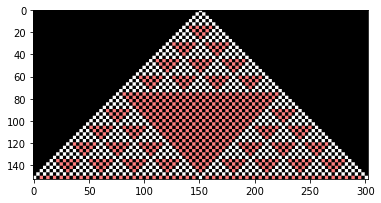

In [44]:
affiche_coefs(N, matCoefs, couleur_fond, taille_case, trouve_couleur_5)

### Ces trois critères d'affichage font apparaître des triangles de Sierpinski. Cet exercice est un exemple classique de l'émergence des fractales.

In [73]:
def affiche_coefs(N, matCoefs, couleur_fond, taille_case, trouve_couleur):
    """
    Affiche une image représentant les coefficients de matCoefs selon le code 
    couleur prévus dans la fonction trouve_couleur.
    
    Prérequis :
    N est un entier positif.
    matCoefs est une matrice d'entiers positifs de taille (N+1)*(N+1).
    Couleur_fond est un entier compris entre NOIR et BLANC.
    trouve_couleur est une fonction répondant aux spécifications suivantes :
    ---------------------------------------------------------------------------------- 
    def trouve_couleur(valeur, NOIR, BLANC) :  
        Prérequis :
        Valeur, NOIR et BLANC sont des entiers, BLANC > NOIR >= 0.
    
        Renvoie un tableau à trois éléments. Ces éléments sont des entiers compris entre 
        NOIR et BLANC inclus.
        Ce tableau représente la couleur associée à une valeur de coefficient binomial
        valeur dans la convention RGB décrite ci-dessus.
    ----------------------------------------------------------------------------------
    """
    # matImage est la matrice contenant les couleurs de tous les pixels, tels qu'ils
    # seront positionnés dans l'image (l'élément en position [i][j] dans la matrice 
    # représente le pixel sur la i-ème ligne et la j-ème colonne).
    # Ses dimensions sont donc les dimensions de l'image :
    #   largeur : (2 * N + 1) * taille_case pour N + 1 coefficients et N cases vides
    #    sur la dernière ligne
    #   hauteur : (N + 1) * taille_case pour N + 1 lignes
    # On notera qu'initialement matImage représente une image uniforme de la couleur
    # du fond.
    
    # Ne pas modifier la création de matImage
    couleur_fond = np.array(couleur_fond)
    matImage = [[couleur_fond]* (2 * N + 1) * taille_case] * (N + 1) * taille_case
    for i in range((N+1) * taille_case) :
        matImage[i] =np.array([couleur_fond]* (2 * N + 1) * taille_case)
    
    # Complétez matImage
    for n in range (N + 1):
        for k in range(n+1):
            intervale_i, intervale_j = zone_case(N, n, k, taille_case)
            couleur = trouve_couleur(matCoefs[n][k], NOIR, BLANC)
            for i in intervale_i :
                for j in intervale_j :
                    matImage[i][j] = couleur

    # Affichage
    return(matImage)

In [74]:
im1 = np.array(affiche_coefs(N, matCoefs, couleur_fond, taille_case, trouve_couleur))
im2 = np.array(affiche_coefs(N, matCoefs, couleur_fond, taille_case, trouve_couleur_parite))
im3 = np.array(affiche_coefs(N, matCoefs, couleur_fond, taille_case, trouve_couleur_3))
im4 = np.array(affiche_coefs(N, matCoefs, couleur_fond, taille_case, trouve_couleur_5))

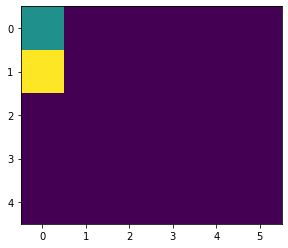

In [96]:
import matplotlib.animation as animation
import numpy as np 
im1 = np.array([[100, 0, 0, 0, 0, 0],
               [200, 0, 0, 0, 0, 0],
               [0, 0, 0, 0, 0, 0],
               [0, 0, 0, 0, 0, 0],
               [0, 0, 0, 0, 0, 0]])
im2 = np.array([[100, 100, 100, 100, 100, 100],
               [0, 0, 0, 0, 0, 0],
               [0, 0, 0, 0, 0, 0],
               [0, 0, 0, 0, 0, 0],
               [0, 0, 0, 0, 0, 0]])
im3 = np.array([[100, 100, 100, 100, 100, 100],
               [200, 200, 200, 200, 200, 200],
               [0, 0, 0, 0, 0, 0],
               [0, 0, 0, 0, 0, 0],
               [0, 0, 0, 0, 0, 0]])
im4 = np.array([[100, 100, 100, 100, 100, 100],
               [200, 200, 200, 200, 200, 200],
               [200, 200, 200, 200, 200, 200],
               [0, 0, 0, 0, 0, 0],
               [0, 0, 0, 0, 0, 0]])
stockage_RGB = np.array([im1, im2, im3, im1])
im = plt.imshow(stockage_RGB[0],animated = True)

fps = 1
nSeconds = 4

def func(i):
    if i % fps == 0:
        print( '.', end ='' )
    im.set_array(stockage_RGB[i])

    return [im]

fig = plt.figure(figsize=(8,8))

anim = animation.FuncAnimation(fig, func, frames = nSeconds * fps,
                               interval = 1000 / fps) # in ms
plt.close()